# Example EDA of toxicity annotation dataset

## Step 1: Download datasets

## Step 2: Load tables using pandas

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
aggression_annotations = pd.read_csv("aggression_annotations.tsv", delimiter="\t")
aggression_annotated_comments = pd.read_csv("aggression_annotated_comments.tsv", delimiter="\t")
aggression_worker_demographics = pd.read_csv("aggression_worker_demographics.tsv", delimiter="\t")

Briefly inspect each table.

In [3]:
aggression_annotations.head()

,rev_id,worker_id,aggression,aggression_score
0,37675,1362,1.0,-1.0
1,37675,2408,0.0,1.0
2,37675,1493,0.0,0.0
3,37675,1439,0.0,0.0
4,37675,170,0.0,0.0


In [4]:
aggression_annotated_comments.head()

,rev_id,comment,year,logged_in,ns,sample,split
0,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,True,article,random,train
1,44816,`NEWLINE_TOKENNEWLINE_TOKEN:: the term ``stand...,2002,True,article,random,train
2,49851,"NEWLINE_TOKENNEWLINE_TOKENTrue or false, the s...",2002,True,article,random,train
3,89320,"Next, maybe you could work on being less cond...",2002,True,article,random,dev
4,93890,This page will need disambiguation.,2002,True,article,random,train


In [5]:
aggression_worker_demographics.head()

,worker_id,gender,english_first_language,age_group,education
0,833,female,0,45-60,bachelors
1,1072,male,0,30-45,bachelors
2,872,male,0,18-30,hs
3,2116,male,0,30-45,professional
4,453,male,0,30-45,hs


## Step 3: Join annotation table to demographics table

In [6]:
joined_annotations = pd.merge( aggression_annotations, aggression_worker_demographics, left_on="worker_id", right_on="worker_id")

In [7]:
joined_annotations.shape

(855514, 8)

In [8]:
joined_annotations.head()

,rev_id,worker_id,aggression,aggression_score,gender,english_first_language,age_group,education
0,37675,1362,1.0,-1.0,male,0,18-30,masters
1,3202092,1362,0.0,0.0,male,0,18-30,masters
2,4745553,1362,0.0,0.0,male,0,18-30,masters
3,4855563,1362,0.0,0.0,male,0,18-30,masters
4,8350378,1362,0.0,0.0,male,0,18-30,masters


Filter on only the male workers.

In [9]:
male_joined_annotations = joined_annotations[ ( joined_annotations.gender == "male" ) ]

In [10]:
male_joined_annotations.shape

(547328, 8)

In [11]:
male_joined_annotations.head()

,rev_id,worker_id,aggression,aggression_score,gender,english_first_language,age_group,education
0,37675,1362,1.0,-1.0,male,0,18-30,masters
1,3202092,1362,0.0,0.0,male,0,18-30,masters
2,4745553,1362,0.0,0.0,male,0,18-30,masters
3,4855563,1362,0.0,0.0,male,0,18-30,masters
4,8350378,1362,0.0,0.0,male,0,18-30,masters


In [19]:
male_joined_annotations.tail()

,rev_id,worker_id,aggression,aggression_score,gender,english_first_language,age_group,education
855508,270016254,3964,0.0,0.0,male,0,Under 18,some
855509,281960519,3964,0.0,1.0,male,0,Under 18,some
855510,289741535,3964,1.0,-1.0,male,0,Under 18,some
855511,392852210,3964,0.0,0.0,male,0,Under 18,some
855512,538094319,3964,0.0,0.0,male,0,Under 18,some


In [ ]:
male_joined_annotations[ 'aggression_score' ].hist()
plt.ylabel("Number of ratings",fontsize=12)
plt.xlabel("Aggression score",fontsize=12)
plt.title('Males: aggression score', fontsize=15)

In [ ]:
male_joined_annotations[ 'education' ].hist()
plt.ylabel("Number of ratings",fontsize=12)
plt.xlabel("Education",fontsize=12)
plt.title('Males: education', fontsize=15)

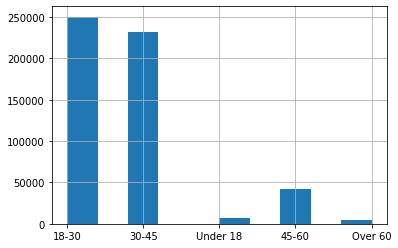

In [21]:
male_joined_annotations[ 'age_group' ].hist()

## Basic EDA

At this point you start asking question.

I can calculate the average score per worker - that worker's "toxicity bias". Is this different for different age groups?

In [ ]:
avg_worker_aggression = joined_annotations.groupby("worker_id")["aggression_score"].mean()
aggression_worker_demographics = aggression_worker_demographics.join( avg_worker_aggression )

Take a quick look at our newly augmented table.

In [ ]:
aggression_worker_demographics.head()

Now let's compute an average toxicity statistic for each group...

In [ ]:
aggression_worker_demographics.groupby("age_group").aggression_score.mean()

The "toxicity bias" does vary by group!

We can even plot the distribution of personal biases in each group:

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title("Distribution of worker's mean toxicity rating, by age group")
sns.violinplot( x="aggression_score", y="age_group", data=aggression_worker_demographics, ax=ax )

## A very basic bias question: is the set of annotation workers gender-balanced?

In [ ]:
foo = aggression_worker_demographics.groupby("gender").worker_id.count()
foo/foo.sum()

The answer is **no** - 64.8% of annotators are male.

## Is the set of _annotations_ gender-balanced?

In [ ]:
foo = joined_annotations.groupby("gender").rev_id.count()
foo/foo.sum()

Also no, about the same fraction - 64.8% of annotations - were made by male annotators.